<a href="https://colab.research.google.com/github/Ajayumbarkar/Data_Science-Projects/blob/main/Final_Stroke_Prediction_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="mobile.jpg">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>Stroke Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Case study** : Factors affecting Stroke using various model like:
 

*   Random Forest

*   XGBoost Boosting


**Context**:

1.According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

2.This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. 

3.Each row in the data provides relavant information about the patient.

**ATTRIBUTE**/**FEATURES** **INFORMATION**:

1) id: unique identifier


2) gender: "Male", "Female" or "Other"


3) age: age of the patient


4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension


5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease


6) ever_married: "No" or "Yes"


7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"


8) Residence_type: "Rural" or "Urban"


9) avg_glucose_level: average glucose level in blood


10) bmi: body mass index


11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*


12) stroke: 1 if the patient had a stroke or 0 if not



In [ ]:
#importing the drive for required file
from google.colab import drive
drive.mount('/gdrive')
%cd '/gdrive/My Drive/capstone project'

Mounted at /gdrive
/gdrive/My Drive/capstone project


<a id='import_lib'></a>
# 1. Import Libraries

In [ ]:
#importing the required libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='RD'></a>
# 2. Read Data

In [ ]:
data = pd.read_csv("train_2v.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [ ]:
#making the shallow copy of the data for EDA and data analysis 
#shalllow copy is made bcz  if any changes done that should not change in original data
df = data.copy()
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [ ]:
#check the first five records
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [ ]:
#check the last five records
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0
43399,36271,Female,82.0,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


In [ ]:
#getting all the information of dataset using info command 
#info command gives
  #1 No of rows 
  #2 No of columns 
  #3 No of float,int,object columns 
  #4 Datatype of all the columns
  #5 Data used for storing 
  #6 Notnull values of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [ ]:
#Filtering the missing values 
#checking the null values in dataset using df.isnull() command 
#to_list  creates the list of the output of null values with the sum of nullvalues of every column
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.drop('id', axis = 1, inplace = True)

<a id='RD'></a>
# 3. To check the null values

In [ ]:
df.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

1.Only two columns have null values.

In [ ]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [ ]:
df['smoking_status'] = df['smoking_status'].fillna(df['smoking_status'].mode()[0])

In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Fill the all null values.

<a id='RD'></a>
# 4. To visualize the Data.

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

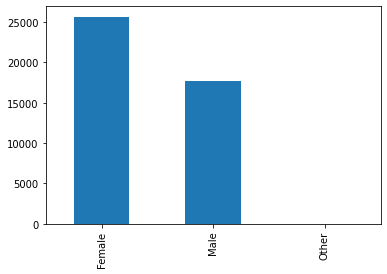

In [ ]:
#pallate = Rainbow
df['gender'].value_counts().plot(kind='bar')

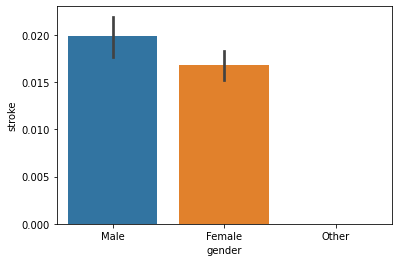

In [ ]:
sns.barplot(x = df['gender'],y = df['stroke'])
plt.show()

In [ ]:
df['age'].unique()

array([3.00e+00, 5.80e+01, 8.00e+00, 7.00e+01, 1.40e+01, 4.70e+01,
       5.20e+01, 7.50e+01, 3.20e+01, 7.40e+01, 7.90e+01, 3.70e+01,
       4.00e+01, 3.50e+01, 2.00e+01, 4.20e+01, 4.40e+01, 6.50e+01,
       5.70e+01, 4.90e+01, 7.10e+01, 5.90e+01, 2.50e+01, 6.70e+01,
       3.80e+01, 5.40e+01, 2.70e+01, 2.30e+01, 5.50e+01, 1.70e+01,
       1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 4.50e+01, 6.60e+01,
       6.90e+01, 5.30e+01, 7.80e+01, 4.30e+01, 5.10e+01, 3.00e+01,
       4.60e+01, 6.10e+01, 4.80e+01, 2.90e+01, 1.10e+01, 7.60e+01,
       2.10e+01, 1.80e+01, 3.30e+01, 8.20e+01, 2.40e+01, 3.40e+01,
       6.40e+01, 6.80e+01, 6.00e+01, 3.60e+01, 3.90e+01, 6.40e-01,
       7.20e+01, 4.10e+01, 5.60e+01, 8.80e-01, 5.00e+00, 8.00e+01,
       2.60e+01, 3.10e+01, 7.00e+00, 1.20e+01, 6.30e+01, 6.20e+01,
       2.00e+00, 8.10e+01, 9.00e+00, 1.50e+01, 2.80e+01, 1.00e+01,
       7.70e+01, 1.80e+00, 3.20e-01, 1.08e+00, 7.30e+01, 5.00e+01,
       1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e+00, 1.72e

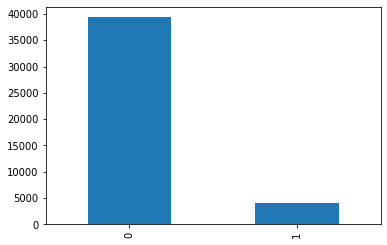

In [ ]:
df['hypertension'].value_counts().plot(kind ='bar')

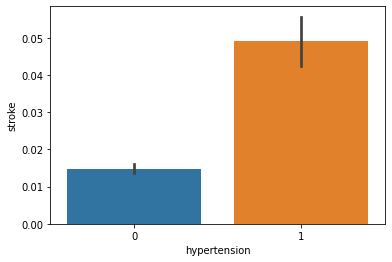

In [ ]:
sns.barplot(x = df['hypertension'], y = df['stroke'])
plt.show()

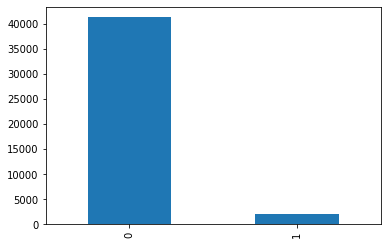

In [ ]:
df['heart_disease'].value_counts().plot(kind='bar')

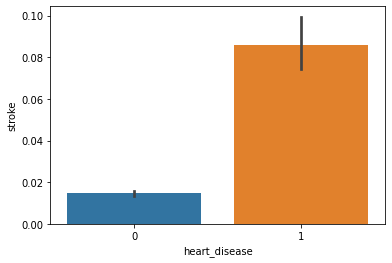

In [ ]:
sns.barplot(x = df['heart_disease'], y = df['stroke'])
plt.show()

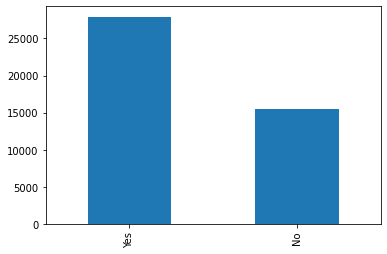

In [ ]:
df['ever_married'].value_counts().plot(kind = 'bar')

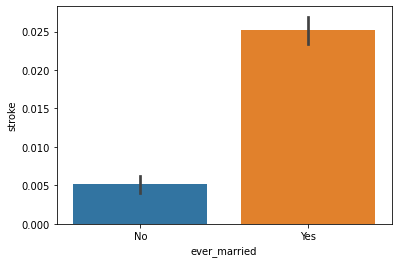

In [ ]:
sns.barplot(x = df['ever_married'], y = df['stroke'])
plt.show()

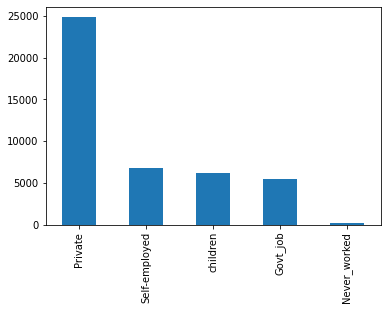

In [ ]:
df['work_type'].value_counts().plot(kind = 'bar')

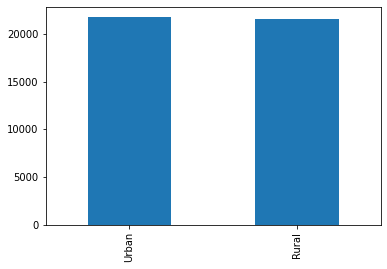

In [ ]:
df['Residence_type'].value_counts().plot(kind = 'bar')

In [ ]:
df['avg_glucose_level'].unique()

array([ 95.12,  87.96, 110.89, ..., 182.45, 121.45, 132.22])

In [ ]:
df['bmi'].unique()

array([18. , 39.2, 17.6, 35.9, 19.1, 50.1, 17.7, 27. , 32.3, 54.6, 35. ,
       22. , 39.4, 26.1, 42.4, 33. , 19.7, 22.5, 24.6, 25.2, 41.8, 60.9,
       31.5, 27.3, 23.7, 24.5, 28.4, 26.9, 26.7, 31.2, 25. , 25.4, 27.5,
       16. , 31.6, 25.1, 30.9, 24.8, 23.4, 29.4, 18.3, 20. , 19.5, 36. ,
       27.7, 28.5, 26.8, 33.6, 29.1, 34.9, 35.3, 26.4, 40.1, 43.1, 36.7,
       29.3, 21.2, 36.6, 21.4, 27.9, 34.3, 31. , 38.7, 27.6, 16.5, 22.8,
       35.4, 24.3, 25.7, 21.9, 38.4, 30.5, 25.9, 54.7, 29.9, 18.6, 27.1,
       24.9, 19.4, 29. , 48.2, 34.6, 25.8, 27.2, 20.7, 30. , 37.3, 34.1,
       23.6, 39.5, 23.5, 23.3, 64.8, 28.1, 24.4, 29.8, 35.1, 43.6, 21. ,
       47.3, 16.6, 37.5, 24.2, 21.6, 31.1, 15.5, 20.5, 35.6, 16.7, 41.9,
       16.4, 17.1, 29.2, 37.9, 32.5, 44.6, 33.2, 22.3, 39.6, 37.8, 40.3,
       41.5, 41.6, 23.8, 39. , 23.2, 18.9, 36.1, 36.3, 40.5, 46.5, 16.8,
       46.6, 26.2, 35.2, 20.9, 36.8, 34.4, 22.2, 13.8, 31.7, 34.2, 36.9,
       31.9, 31.8, 29.5, 28.8, 28.9, 15.3, 37.1, 38

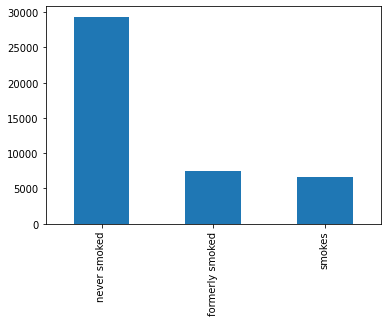

In [ ]:
df['smoking_status'].value_counts().plot(kind = 'bar')

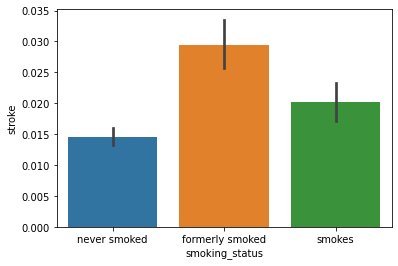

In [ ]:
sns.barplot(x = df['smoking_status'], y = df['stroke'])
plt.show()

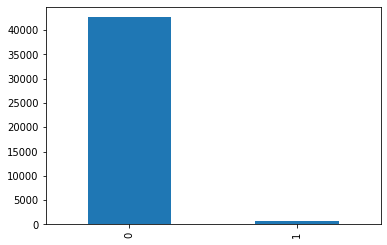

In [ ]:
df['stroke'].value_counts().plot(kind = 'bar')

<a id='RD'></a>
# 5. To check the correlation Dependent and Independent Features\.

In [ ]:
correlation = df.corr()
correlation

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.272169,0.250188,0.237627,0.350231,0.156049
hypertension,0.272169,1.000000,0.119777,0.160211,0.151361,0.075332
heart_disease,0.250188,0.119777,1.000000,0.146938,0.051753,0.113763
avg_glucose_level,0.237627,0.160211,0.146938,1.000000,0.181899,0.078917
bmi,0.350231,0.151361,0.051753,0.181899,1.000000,0.016073
stroke,0.156049,0.075332,0.113763,0.078917,0.016073,1.000000


In [ ]:
correlation["stroke"].sort_values(ascending = False)

stroke               1.000000
age                  0.156049
heart_disease        0.113763
avg_glucose_level    0.078917
hypertension         0.075332
bmi                  0.016073
Name: stroke, dtype: float64

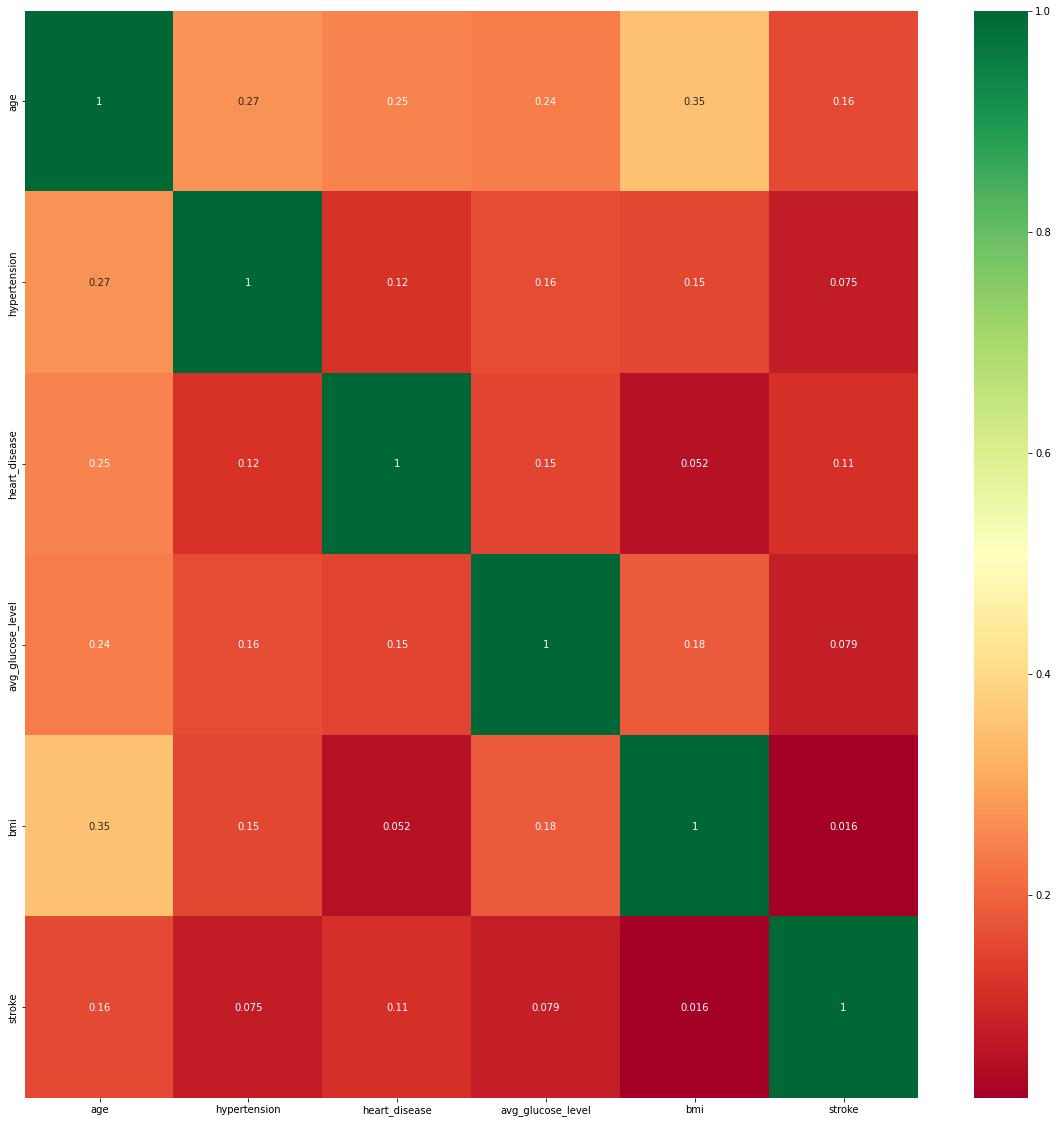

In [ ]:
top_corr_features = correlation.index
plt.figure(figsize=(20,20))
#plot heat map
g= sns.heatmap(df[top_corr_features].corr(),annot = True,cmap="RdYlGn")

<a id='RD'></a>
# 5. To create  dummies variable of catogorical variable.

In [ ]:
cat_variable = df.select_dtypes(include='object').columns.tolist()
cat_variable

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [ ]:
gender = df[["gender"]]

gender = pd.get_dummies(gender, drop_first= True)

gender.head()

,gender_Male,gender_Other
0,1,0
1,1,0
2,0,0
3,0,0
4,1,0


In [ ]:
work_type = df[["work_type"]]

work_type = pd.get_dummies(work_type, drop_first= True)

work_type.head()

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,0,0,1
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0


In [ ]:
ever_married = df[["ever_married"]]

ever_married = pd.get_dummies(ever_married, drop_first= True)

ever_married.head()

,ever_married_Yes
0,0
1,1
2,0
3,1
4,0


In [ ]:
Residence_type = df[["Residence_type"]]

Residence_type = pd.get_dummies(Residence_type, drop_first= True)

Residence_type.head()

,Residence_type_Urban
0,0
1,1
2,1
3,0
4,0


In [ ]:
smoking_status = df[["smoking_status"]]

smoking_status = pd.get_dummies(smoking_status, drop_first= True)

smoking_status.head()

,smoking_status_never smoked,smoking_status_smokes
0,1,0
1,1,0
2,1,0
3,0,0
4,1,0


In [ ]:
Final_data = pd.concat([df, gender, ever_married, work_type, Residence_type, smoking_status], axis = 1)


In [ ]:
Final_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,...,1,0,0,0,0,0,1,0,1,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,...,1,0,1,0,1,0,0,1,1,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,...,0,0,0,0,1,0,0,1,1,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,...,0,0,1,0,1,0,0,0,0,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
Final_data.drop(['gender','ever_married','work_type','Residence_type','smoking_status'], axis = 1, inplace = True)

In [ ]:
Final_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,95.12,18.0,0,1,0,0,0,0,0,1,0,1,0
1,58.0,1,0,87.96,39.2,0,1,0,1,0,1,0,0,1,1,0
2,8.0,0,0,110.89,17.6,0,0,0,0,0,1,0,0,1,1,0
3,70.0,0,0,69.04,35.9,0,0,0,1,0,1,0,0,0,0,0
4,14.0,0,0,161.28,19.1,0,1,0,0,1,0,0,0,0,1,0


<a id='RD'></a>
# 6. Split the data.

In [ ]:
X = Final_data.drop(['stroke'],axis =1)
y = Final_data[['stroke']]

In [ ]:
print(X.head())

    age  hypertension  heart_disease  avg_glucose_level   bmi  gender_Male  \
0   3.0             0              0              95.12  18.0            1   
1  58.0             1              0              87.96  39.2            1   
2   8.0             0              0             110.89  17.6            0   
3  70.0             0              0              69.04  35.9            0   
4  14.0             0              0             161.28  19.1            1   

   gender_Other  ever_married_Yes  work_type_Never_worked  work_type_Private  \
0             0                 0                       0                  0   
1             0                 1                       0                  1   
2             0                 0                       0                  1   
3             0                 1                       0                  1   
4             0                 0                       1                  0   

   work_type_Self-employed  work_type_children  Re

In [ ]:
print(y.head())

   stroke
0       0
1       0
2       0
3       0
4       0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
df['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [ ]:
y_train.value_counts()/len(y_train)

stroke
0         0.981962
1         0.018038
dtype: float64

1.Data is Imbalance , Because the no of 1s is more than 0s.

2.It is the huge gap 1s and 0s. 

3.Ratio of 1s is 0.981962 and 0s is 0.018038

<a id='RD'></a>
# 7. Smote Techinque.

1. Using the SMOTE techinque convert Imblanced Dataset to Balance Dataset.

In [ ]:
from imblearn.combine import SMOTETomek


In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss


In [ ]:
smk = SMOTETomek(random_state=0)
X_res,y_res=smk.fit_resample(X,y)


In [ ]:
X_res.shape,y_res.shape


((85098, 15), (85098, 1))

To equal the no of 1s and 0s using SMOTE Techinqe.

<a id='RD'></a>
# 8. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from pandas.core.common import random_state
rf=RandomForestClassifier(random_state=7)
rf.fit(X_res,y_res)

RandomForestClassifier(random_state=7)

In [ ]:
pred_train=rf.predict(X_train)

In [ ]:
pred_test = rf.predict(X_test)

In [ ]:
#import required finding values
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [ ]:
print("Recall on train data:",recall_score(y_train,pred_train))
print("Recall on test data:",recall_score(y_test,pred_test))
print("\n")

Recall on train data: 1.0
Recall on test data: 1.0




In [ ]:


print("precision on train data:",precision_score(y_train,pred_train))
print("precision on test data:",precision_score(y_test,pred_test))
print("\n")

precision on train data: 0.9891696750902527
precision on test data: 0.9915611814345991




In [ ]:
print("Accuracy on train data:",accuracy_score(y_train,pred_train))
print("Accuracy on test data:",accuracy_score(y_test,pred_test))
print("\n")

Accuracy on train data: 0.9998025016458196
Accuracy on test data: 0.9998463901689708




In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_estimator=RandomForestClassifier(random_state=1)
parameters={
          'n_estimators':[10],
           'min_samples_leaf':np.arange(1,6,1),
           'max_features':['auto'],
           'max_samples':[0.9,None],
          }
 

grid_obj =RandomizedSearchCV(rf_estimator,parameters,n_jobs=-1,n_iter=10,scoring='recall',cv=10)
grid_obj=grid_obj.fit(X_res,y_res)
rf_estimator=grid_obj.best_estimator_
rf_estimator.fit(X_res,y_res)

RandomForestClassifier(max_samples=0.9, n_estimators=10, random_state=1)

In [ ]:
pred_train1=rf_estimator.predict(X_train)

In [ ]:
pred_test1=rf_estimator.predict(X_test)

In [ ]:
print("Recall on train data:",recall_score(y_train,pred_train1))
print("Recall on test data:",recall_score(y_test,pred_test1))
print("\n")

Recall on train data: 0.8795620437956204
Recall on test data: 0.851063829787234




In [ ]:
print("precision on train data:",precision_score(y_train,pred_train1))
print("precision on test data:",precision_score(y_test,pred_test1))
print("\n")

precision on train data: 0.9488188976377953
precision on test data: 0.9345794392523364




In [ ]:
print("Accuracy on train data:",accuracy_score(y_train,pred_train1))
print("Accuracy on test data:",accuracy_score(y_test,pred_test1))
print("\n")

Accuracy on train data: 0.9969716919025675
Accuracy on test data: 0.9962365591397849


